<a href="https://colab.research.google.com/github/bhardwajshivam/Gradient-Clipping/blob/main/GradientClipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

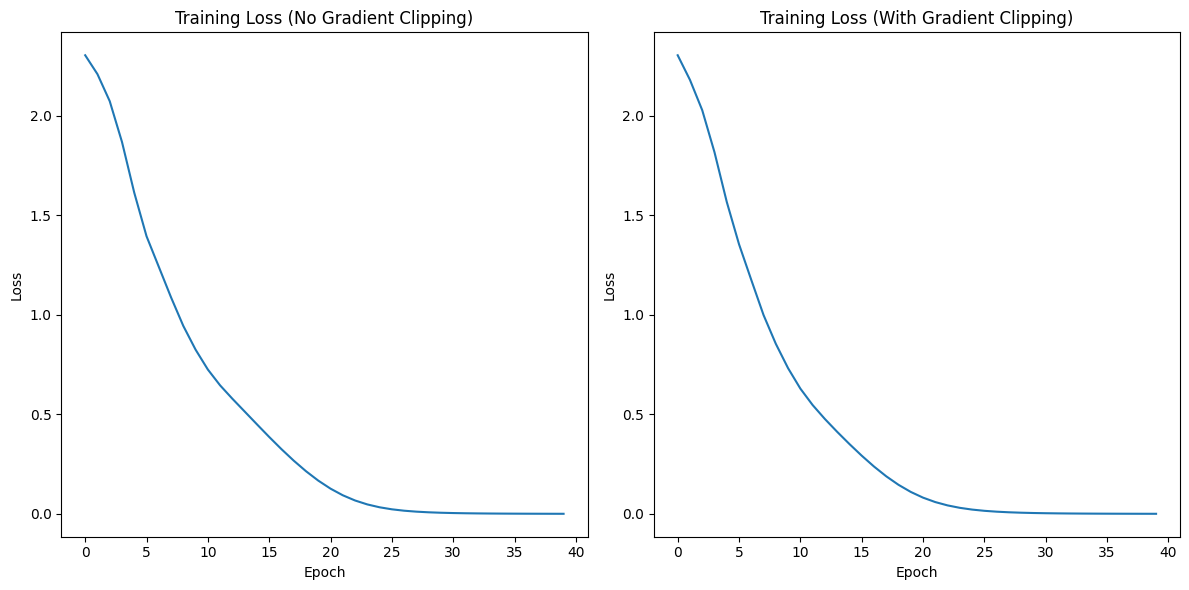

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# toy text data
text_data = ["hello world", "this is an example", "of text generation"]

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)
vocab_size = len(tokenizer.word_index) + 1

# Prepare input and target sequences
input_sequences = [sequence[:-1] for sequence in sequences]
target_sequences = [sequence[1:] for sequence in sequences]

# Pad sequences
max_sequence_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='post')
target_sequences = pad_sequences(target_sequences, maxlen=max_sequence_length, padding='post')

# Build a simple RNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=10, input_length=max_sequence_length))
model.add(SimpleRNN(units=64, return_sequences=True))
model.add(Dense(vocab_size, activation='softmax'))

# Define loss and optimizer
loss_fn = sparse_categorical_crossentropy
optimizer = Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn)

# Training the model without gradient clipping
history_no_clip = model.fit(input_sequences, target_sequences, epochs=40, verbose=0)

# Now, let's train the model with gradient clipping
model_with_clip = Sequential()
model_with_clip.add(Embedding(input_dim=vocab_size, output_dim=10, input_length=max_sequence_length))
model_with_clip.add(SimpleRNN(units=64, return_sequences=True))
model_with_clip.add(Dense(vocab_size, activation='softmax'))

# Define loss and optimizer
loss_fn = sparse_categorical_crossentropy
optimizer_with_clip = Adam(learning_rate=0.01, clipnorm=1.0)  # Gradient clipping with clipnorm

# Compile the model
model_with_clip.compile(optimizer=optimizer_with_clip, loss=loss_fn)

# Training the model with gradient clipping
history_with_clip = model_with_clip.fit(input_sequences, target_sequences, epochs=40, verbose=0)

# Compare training results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_no_clip.history['loss'])
plt.title('Training Loss (No Gradient Clipping)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_with_clip.history['loss'])
plt.title('Training Loss (With Gradient Clipping)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


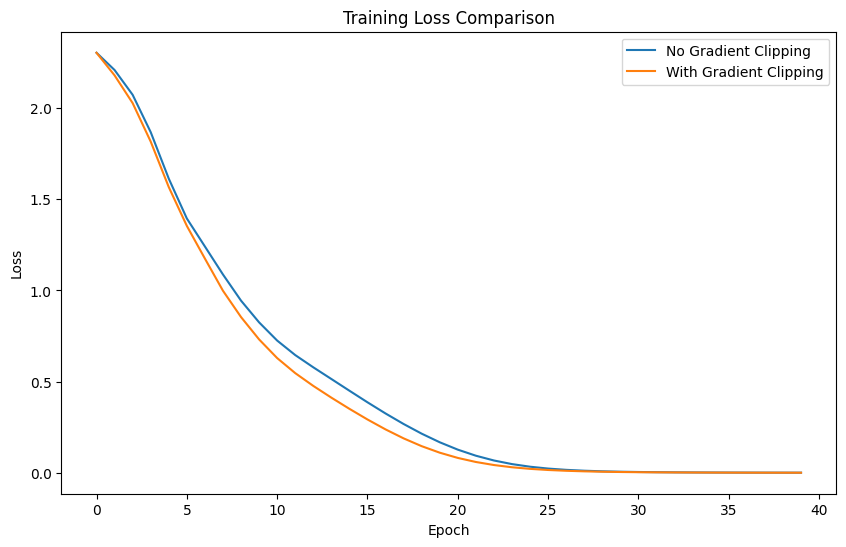

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_no_clip.history['loss'], label='No Gradient Clipping')
plt.plot(history_with_clip.history['loss'], label='With Gradient Clipping')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
